In [2]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:\\Users\\heman\\Downloads\\oasis infobyte projects\\Unemployment_Rate_upto_11_2020.csv")  # reading dataset csv file

In [4]:
data.head()  #prints first 5 rows of the dataset  

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
data.tail()      # prints the last 5 rows of dataset

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [6]:
data.shape     #(m,n) m = no of rows , n = no of columns

(267, 9)

In [7]:
data.isna().sum()    #checking if there are any null values in the data

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [8]:
data.describe()     # basic statistic functions

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [9]:
print(data.columns)    
data.rename(columns={" Date":"Date"," Estimated Unemployment Rate (%)":"EUR"," Estimated Employed":"EE"," Estimated Labour Participation Rate (%)":"ELPR"},inplace=True)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [10]:
data.head()

,Region,Date,Frequency,EUR,EE,ELPR,Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [11]:
# top 5 states with unemployment rates
avg_data = data.groupby("Region")['EUR'].mean()
sorted_avg_data = avg_data.sort_values(ascending=False)
top_5 = sorted_avg_data.head(5)
print(top_5)

Region
Haryana      27.477
Tripura      25.055
Jharkhand    19.539
Bihar        19.471
Delhi        18.414
Name: EUR, dtype: float64


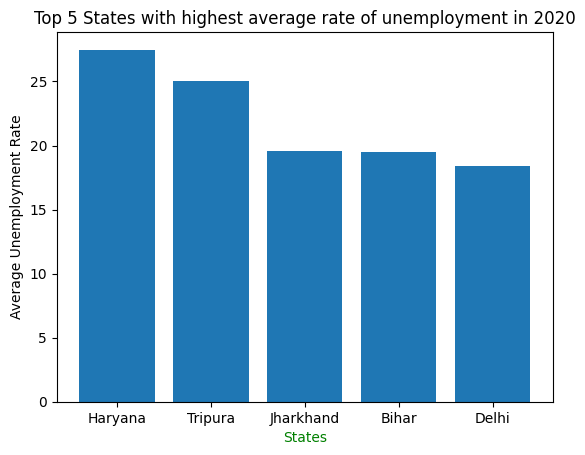

In [12]:
plt.bar(top_5.index,top_5.values)      # bar plot of top 5 states with highest average unemployment rate in 2020
plt.title("Top 5 States with highest average rate of unemployment in 2020")
plt.xlabel("States",color="green")
plt.ylabel("Average Unemployment Rate")
plt.show()

In [13]:
# Unemployment rates Region Wise (East,West,North,South)
region_data = data.groupby("Region.1")["EUR"].mean()
region_data.drop("Northeast",inplace=True)
print(region_data)

Region.1
East     13.916000
North    15.889620
South    10.454667
West      8.239000
Name: EUR, dtype: float64


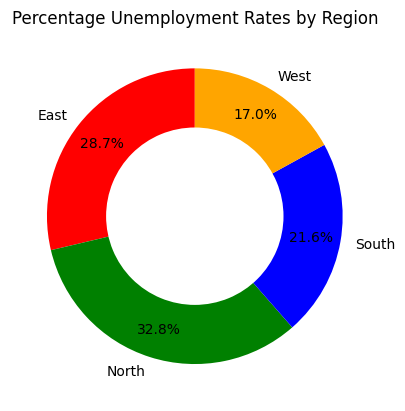

In [14]:
colors = ['red', 'green', 'blue', 'orange']
region_data = {
    'East': 13.916,
    'North': 15.88962,
    'South': 10.454667,
    'West': 8.239
}
fig, ax = plt.subplots()
ax.pie(region_data.values(), labels=region_data.keys(), colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.8, radius=1)
ax.pie([100], radius=0.6, colors=['white'])
ax.set_title('Percentage Unemployment Rates by Region')
plt.show()

In [15]:

data["Date"] = data["Date"].str.strip()
data["Date"] = pd.to_datetime(data["Date"], format="%d-%m-%Y")
data["Month"] = data["Date"].apply(lambda x: x.month)

states = data['Region'].unique()
monthly_rate = {}
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


for state in states:
    monthly_rate[state] = []      # storing each state and their 2020 year unemployment rates in nested list
    for month in months:
        monthly_rate_state_month = data[(data['Region'] == state) & (data['Month'] == month)]['EUR'].values
        if len(monthly_rate_state_month) > 0:
            monthly_rate[state].append(monthly_rate_state_month[0])
        else:
            monthly_rate[state].append(0)


print(monthly_rate)



{'Andhra Pradesh': [5.48, 5.83, 5.79, 20.51, 17.43, 3.31, 8.34, 6.96, 6.4, 6.59], 'Assam': [4.66, 4.41, 4.77, 11.06, 9.55, 0.6, 3.77, 5.53, 1.19, 3.02], 'Bihar': [10.61, 10.29, 15.43, 46.64, 45.96, 17.82, 12.79, 13.44, 11.91, 9.82], 'Chhattisgarh': [9.65, 8.38, 7.54, 3.41, 10.5, 14.23, 10.27, 5.63, 1.96, 6.62], 'Delhi': [22.23, 14.84, 17.04, 16.68, 42.27, 18.19, 20.3, 13.79, 12.53, 6.27], 'Goa': [8.89, 2.81, 5.25, 13.31, 21.25, 9.96, 17.07, 16.21, 15.38, 11.54], 'Gujarat': [5.54, 6.38, 6.66, 18.71, 12.11, 3.2, 1.84, 1.87, 3.42, 4.03], 'Haryana': [20.34, 25.77, 25.05, 43.22, 29.02, 26.7, 24.18, 33.5, 19.68, 27.31], 'Himachal Pradesh': [16.83, 16.84, 18.76, 2.2, 26.95, 13.47, 24.31, 15.79, 12.04, 13.46], 'Jammu & Kashmir': [21.08, 20.78, 15.5, 0, 18.74, 17.92, 10.88, 11.09, 16.17, 16.14], 'Jharkhand': [10.61, 11.85, 8.23, 47.09, 59.23, 20.95, 7.63, 9.76, 8.24, 11.8], 'Karnataka': [2.86, 3.61, 3.46, 29.84, 19.97, 8.44, 4.01, 0.5, 2.41, 1.58], 'Kerala': [5.31, 7.6, 8.99, 16.99, 17.88, 9.71

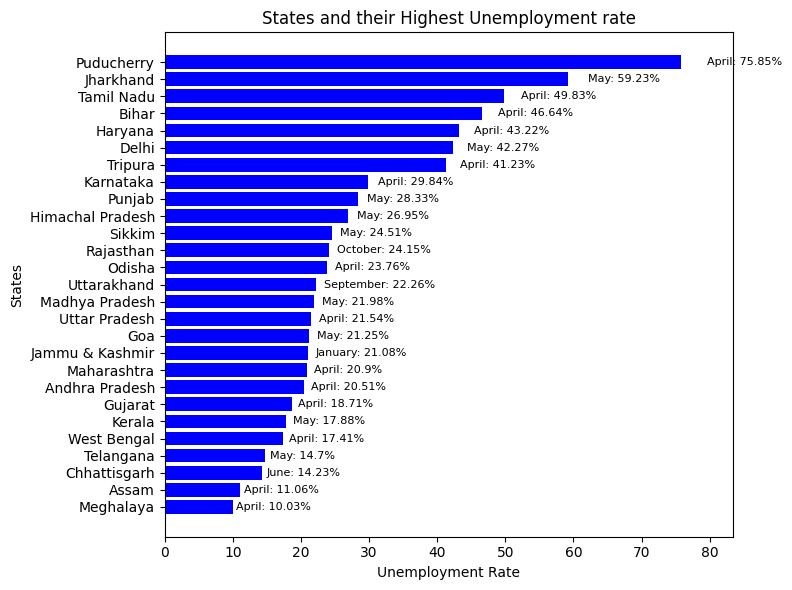

In [16]:
# plotting each state with their highest unemployment rate
state_high_rate = []
month_names = ["January","February","March","April","May","June","July","August","September","October"]
for state, rates in monthly_rate.items():
    max_month = max(rates)
    max_rate = month_names[rates.index(max_month)]
    state_high_rate.append([state, max_month, max_rate])

state_high_rate.sort(key=lambda x: x[1], reverse=True)

states = [x[0] for x in state_high_rate]
rates = [x[1] for x in state_high_rate]
months = [x[2] for x in state_high_rate]

fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(states, rates, color='b')
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('States')
ax.set_title('States and their Highest Unemployment rate')
ax.set_xlim(right=max(rates)*1.1)
ax.invert_yaxis()

for i, (rate, month) in enumerate(zip(rates, months)):
    ax.text(rate*1.05, i, f'{month}: {rate}%', va='center', fontsize=8)

plt.tight_layout()
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

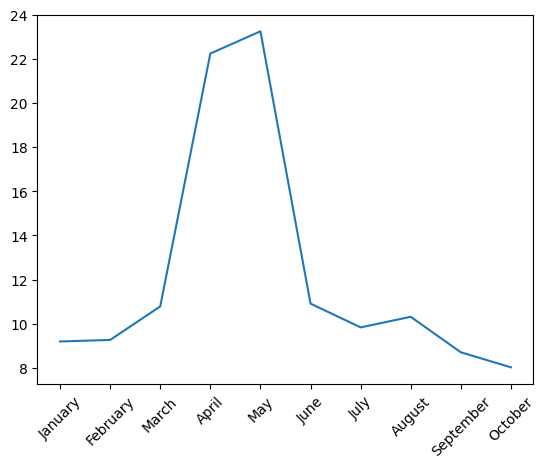

In [17]:
# plotting each month average unemployment rates
month_wise_data = data.groupby(pd.Grouper(key='Date', freq='MS'))['EUR'].mean()
# month_wise_data
# month-wise average unemployment rate
plt.plot(month_names,month_wise_data)
plt.xticks(rotation=45)   # from plot we can see April and May months had more unemployment rate

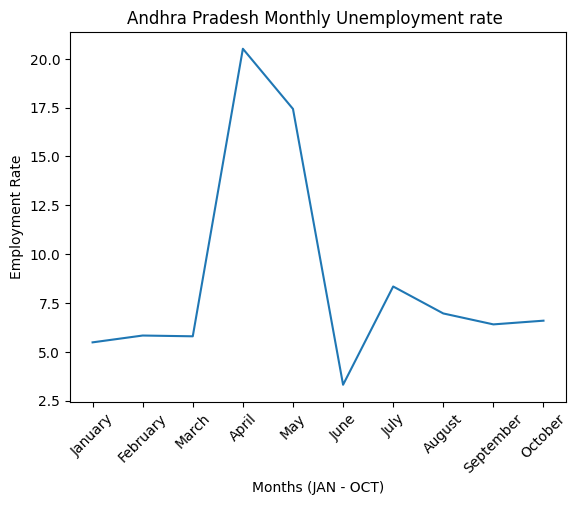

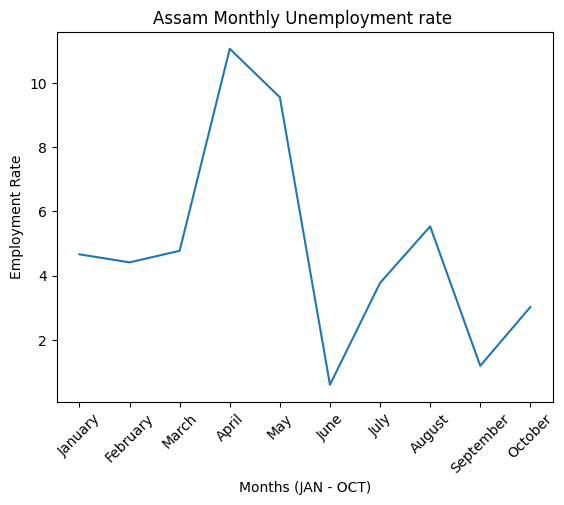

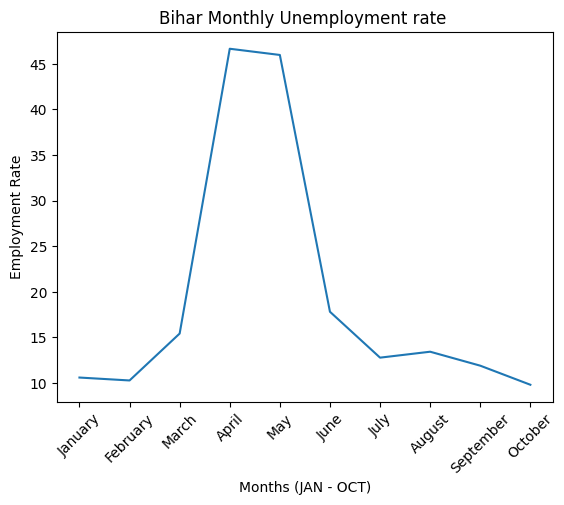

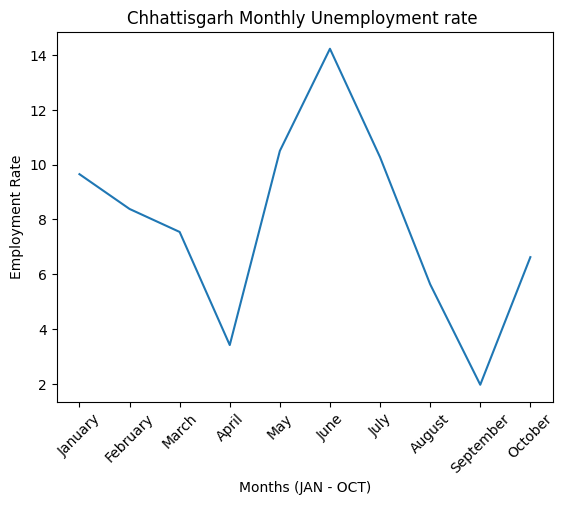

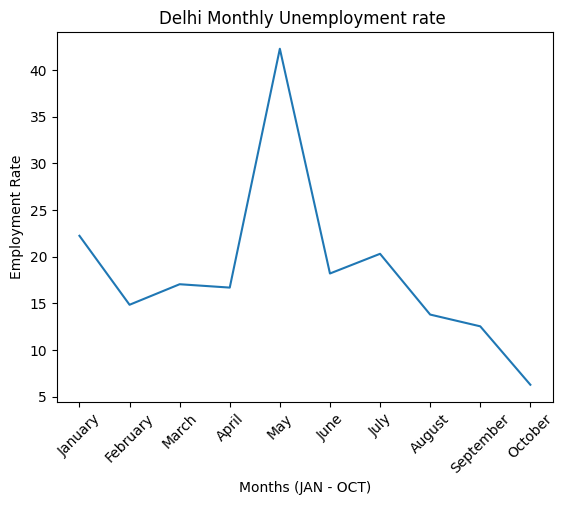

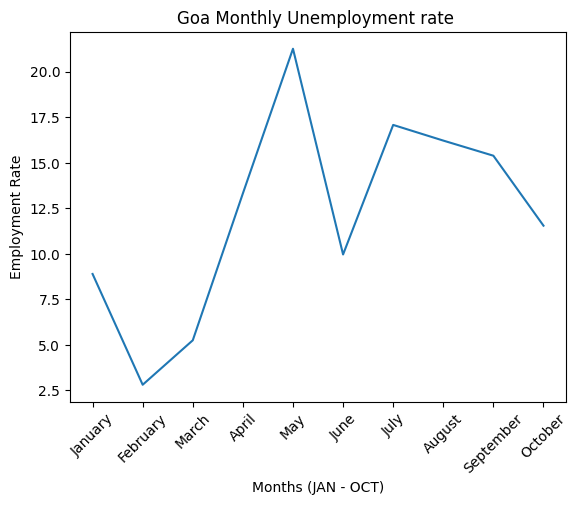

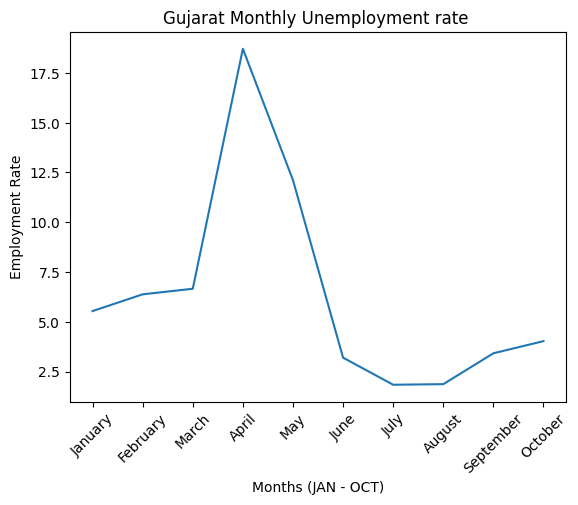

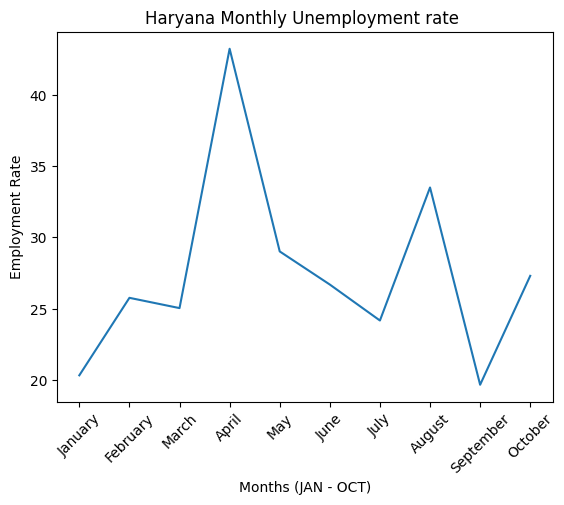

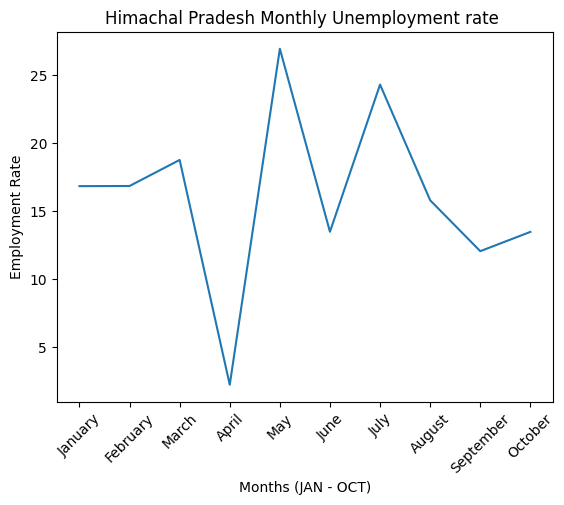

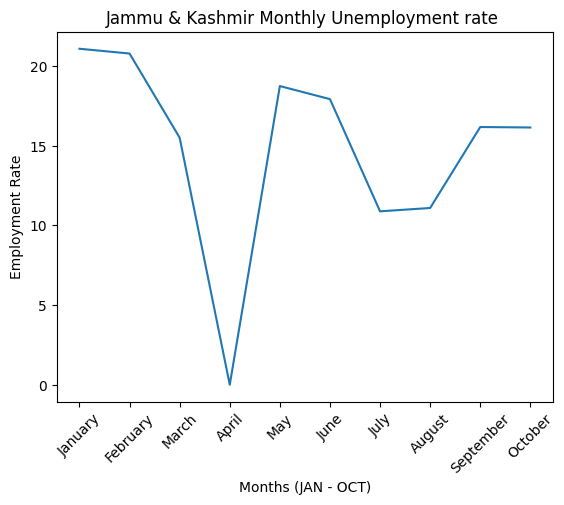

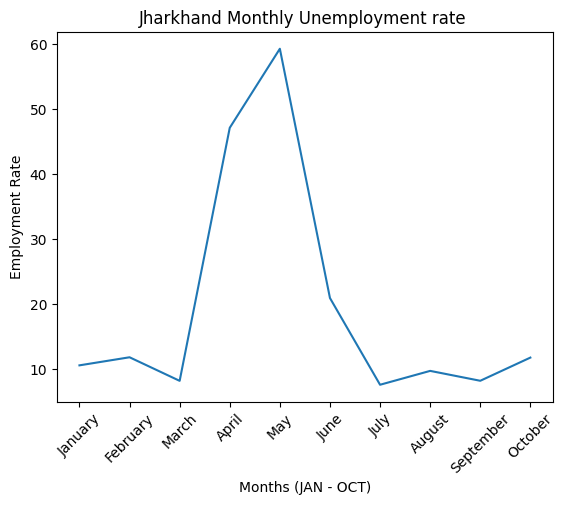

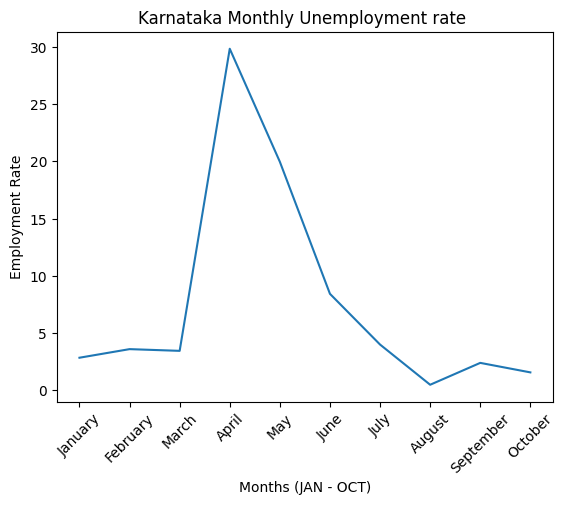

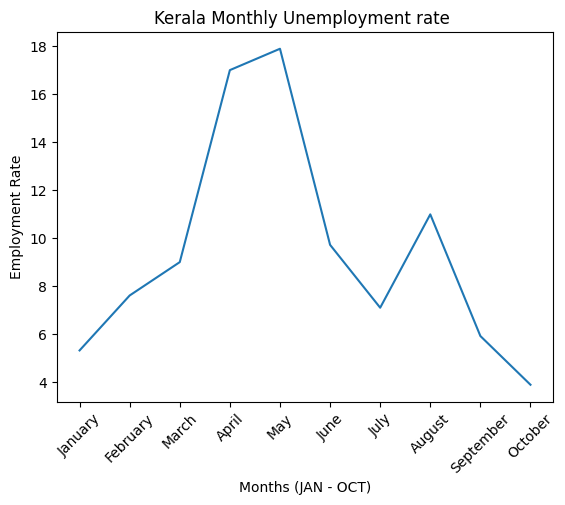

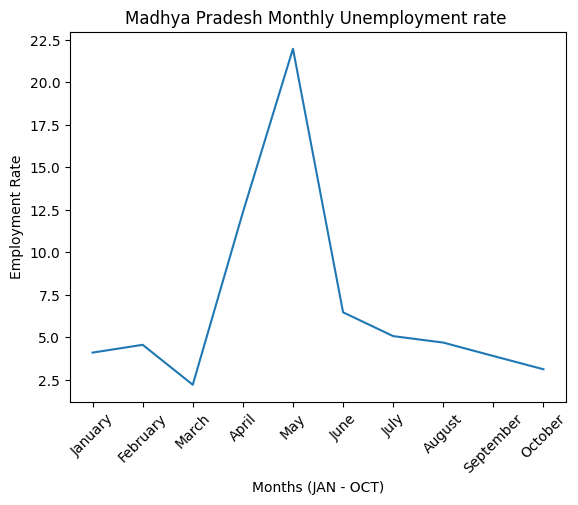

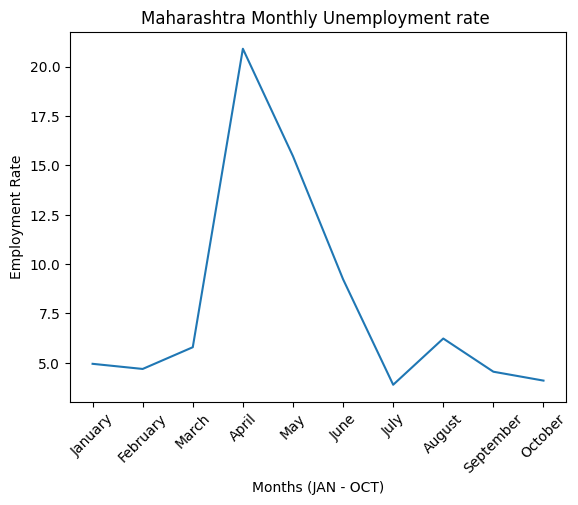

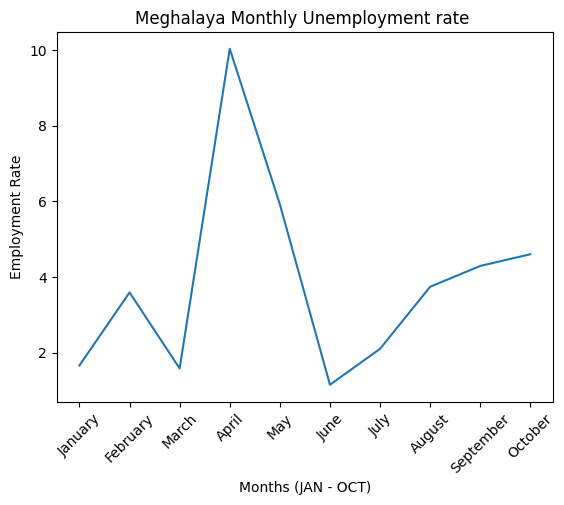

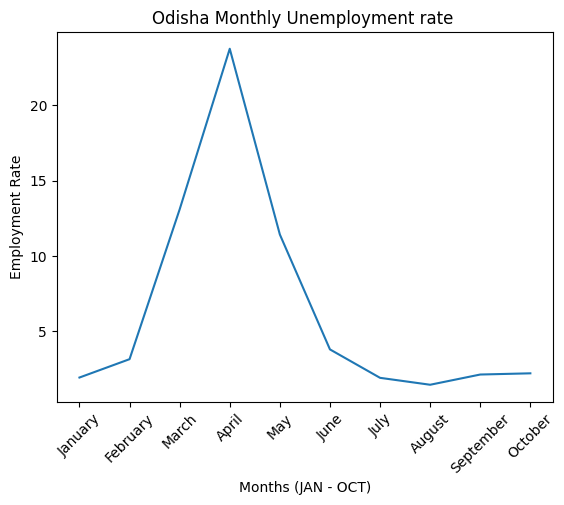

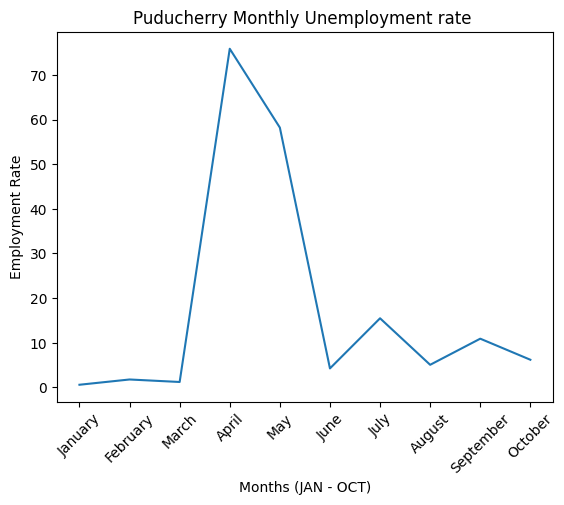

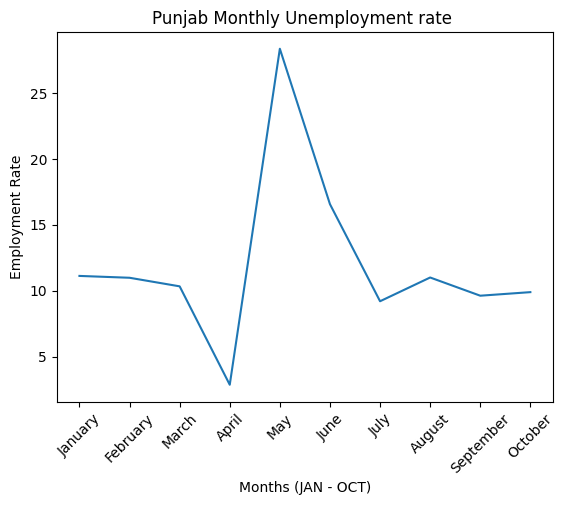

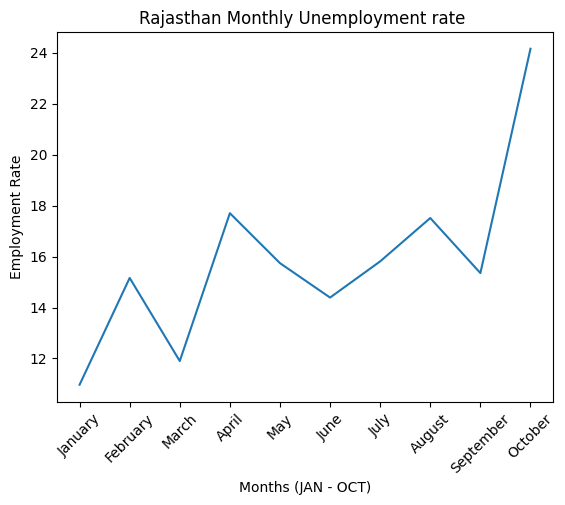

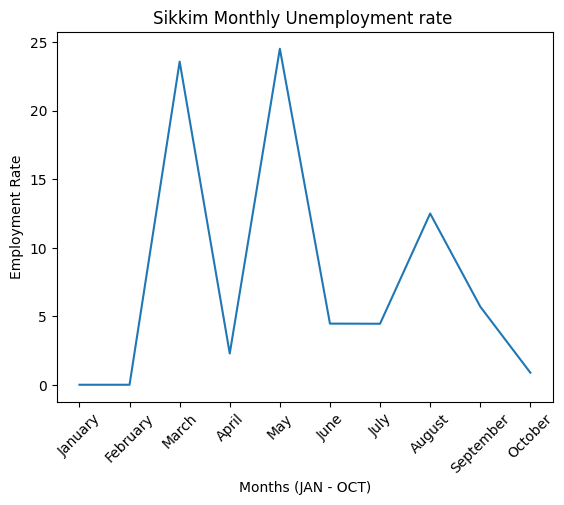

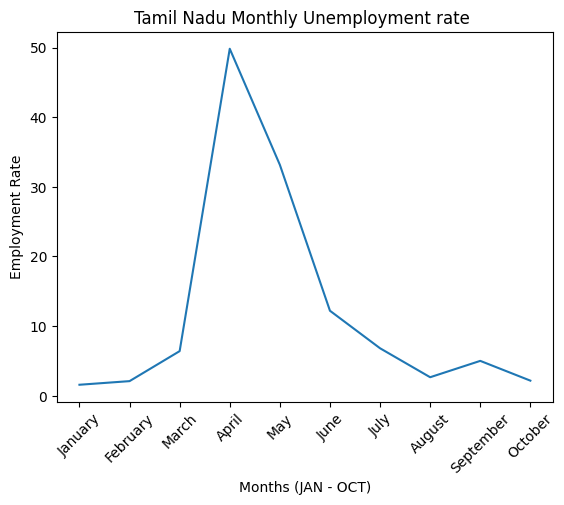

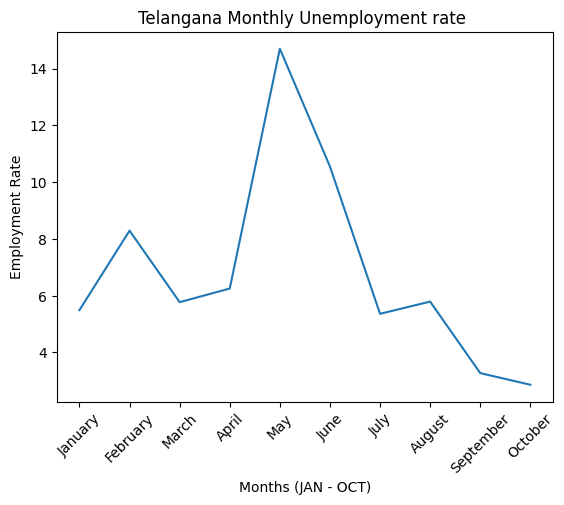

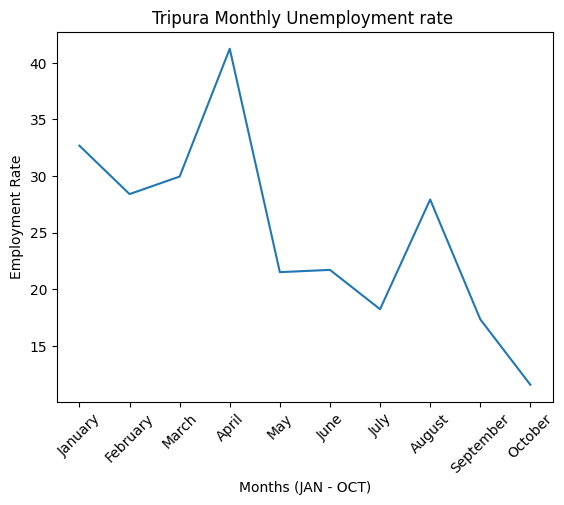

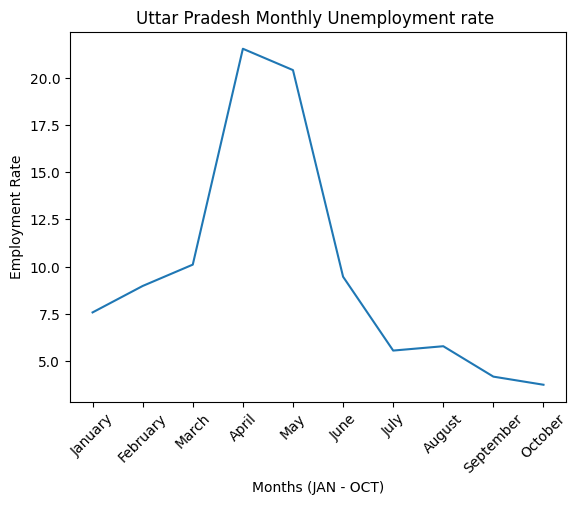

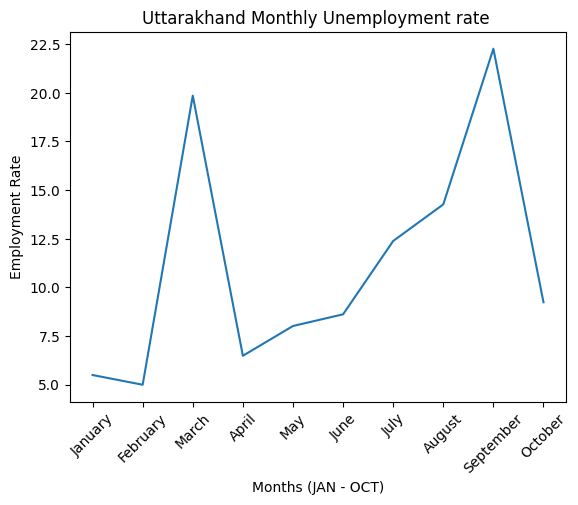

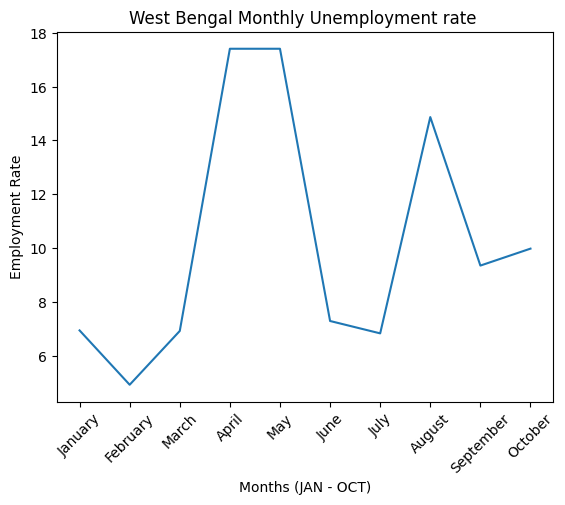

In [18]:
for i in monthly_rate:    # plotting each state and their 2020 year unemployment rate month wise
    plt.plot(month_names,monthly_rate[i])
    plt.title(f"{i} Monthly Unemployment rate ")
    plt.xlabel("Months (JAN - OCT)")
    plt.ylabel("Employment Rate")

    plt.xticks(month_names,rotation=45)
    plt.show()